In [3]:
import json
import os

def save_json_lines_as_txt(json_file, txt_file_path):
    with open(json_file, 'r', encoding='utf-8') as f:
        data = json.load(f)
    if not os.path.exists(txt_file_path):
        os.makedirs(txt_file_path)
        for articles in data:
            for article in articles['articles']:
                law_id = str(articles.get("law_id"))
                if "2020" in law_id:
                    law_id_name = law_id.replace('/', '_')
                    article_id = str(article.get("article_id"))
                    #print_out = f"{law_id}_{article_id}"
                    #print(print_out)
                    text = "Luật "+ law_id + '\n' + str(article.get('title')) + '\n' + str(article.get("text"))               
                    file_name = f"{txt_file_path}/{law_id_name}_{article_id}.txt"
                    with open(file_name, 'w', encoding='utf-8') as txt_file:
                        txt_file.write(text)

# Replace 'your_json_file.json' with the path to your JSON file
json_file_path = '../Raw_data/zalo_2021/legal_corpus.json'
txt_file_path = "../Raw_data/zalo_2021/zalo_txtfile_data"
save_json_lines_as_txt(json_file_path, txt_file_path)

In [4]:
import os

def count_txt_files(folder_path):
    # Khởi tạo biến đếm
    count = 0
    # Duyệt qua tất cả các file trong thư mục
    for file in os.listdir(folder_path):
        # Kiểm tra xem file có phải là file .txt không
        if file.endswith(".txt"):
            count += 1
    return count

# Đường dẫn tới thư mục chứa các file .txt
folder_path = '../Raw_data/zalo_2021/zalo_txtfile_data'
# Thực hiện đếm số lượng file .txt trong thư mục
txt_file_count = count_txt_files(folder_path)
print("Số lượng file .txt trong thư mục:", txt_file_count)

Số lượng file .txt trong thư mục: 6517


In [1]:
import pandas as pd

data = pd.read_csv("../Raw_data/zalo_2021/train_qna.csv")
data.head()

,question_id,question,relevant_articles,question_length,num_articles,relevant_titles
0,0637bf82c8b290c7875c5bfddbf91df5,Công an xã xử phạt lỗi không mang bằng lái xe ...,"[{'law_id': '47/2011/tt-bca', 'article_id': '7'}]",14,1,['47/2011/tt-bca']
1,ade2b2ee4f5b869f75f0d183902382af,Phải thực hiện thao tác nạp mẫu vào bình chứa ...,"[{'law_id': '41/2020/tt-bca', 'article_id': '1...",22,1,['41/2020/tt-bca']
2,8fa164edc7a8419cd7dc9ce66d8e695a,Trình tự đánh giá chất lượng hàng năm đối với ...,"[{'law_id': '159/2020/nđ-cp', 'article_id': '1...",19,1,['159/2020/nđ-cp']
3,3aed91309b72097b34427dd28bebd98a,Tử tù chết sau khi tiêm thuốc độc mà không có ...,"[{'law_id': '53/2010/qh12', 'article_id': '60'...",24,2,"['53/2010/qh12', '82/2011/nđ-cp']"
4,fe9131a8862ce1bfa7de7e2b30eeb39e,Trách nhiệm của Bộ Khoa học và Công nghệ về qu...,"[{'law_id': '63/2020/nđ-cp', 'article_id': '20'}]",25,1,['63/2020/nđ-cp']


In [2]:
data.shape

(3196, 6)

In [3]:
filtered_df = data[data['relevant_titles'].str.contains('2020')]
filtered_df.shape

(742, 6)

In [4]:
filtered_df.head()

,question_id,question,relevant_articles,question_length,num_articles,relevant_titles
1,ade2b2ee4f5b869f75f0d183902382af,Phải thực hiện thao tác nạp mẫu vào bình chứa ...,"[{'law_id': '41/2020/tt-bca', 'article_id': '1...",22,1,['41/2020/tt-bca']
2,8fa164edc7a8419cd7dc9ce66d8e695a,Trình tự đánh giá chất lượng hàng năm đối với ...,"[{'law_id': '159/2020/nđ-cp', 'article_id': '1...",19,1,['159/2020/nđ-cp']
4,fe9131a8862ce1bfa7de7e2b30eeb39e,Trách nhiệm của Bộ Khoa học và Công nghệ về qu...,"[{'law_id': '63/2020/nđ-cp', 'article_id': '20'}]",25,1,['63/2020/nđ-cp']
5,fe7d15e338c05614d38d9556be8ce471,Đập phá biển báo “khu vực biên giới” bị phạt t...,"[{'law_id': '96/2020/nđ-cp', 'article_id': '10'}]",12,1,['96/2020/nđ-cp']
7,240939c7783a252ad86868d87bc8df66,"Thừa phát lại được tống đạt những giấy tờ, hồ ...","[{'law_id': '08/2020/nđ-cp', 'article_id': '32'}]",14,1,['08/2020/nđ-cp']


In [5]:
def extract_article_id(row):
    articles_list = eval(row)  # Chuyển đổi từ chuỗi sang list
    article = articles_list[0]  # Giả sử chỉ có một phần tử trong list
    return article.get('article_id', '')

# Hàm để trích xuất 'law_id' từ một list trong cột 'relevant_articles'
def extract_law_id(row):
    articles_list = eval(row)  # Chuyển đổi từ chuỗi sang list
    article = articles_list[0]  # Giả sử chỉ có một phần tử trong list
    return article.get('law_id', '')

filtered_df.loc[:, 'article_id'] = filtered_df['relevant_articles'].apply(extract_article_id)
filtered_df.loc[:, 'law_id'] = filtered_df['relevant_articles'].apply(extract_law_id)
filtered_df.head()

/tmp/ipykernel_35675/339650231.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, 'article_id'] = filtered_df['relevant_articles'].apply(extract_article_id)
/tmp/ipykernel_35675/339650231.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, 'law_id'] = filtered_df['relevant_articles'].apply(extract_law_id)


,question_id,question,relevant_articles,question_length,num_articles,relevant_titles,article_id,law_id
1,ade2b2ee4f5b869f75f0d183902382af,Phải thực hiện thao tác nạp mẫu vào bình chứa ...,"[{'law_id': '41/2020/tt-bca', 'article_id': '1...",22,1,['41/2020/tt-bca'],11,41/2020/tt-bca
2,8fa164edc7a8419cd7dc9ce66d8e695a,Trình tự đánh giá chất lượng hàng năm đối với ...,"[{'law_id': '159/2020/nđ-cp', 'article_id': '1...",19,1,['159/2020/nđ-cp'],13,159/2020/nđ-cp
4,fe9131a8862ce1bfa7de7e2b30eeb39e,Trách nhiệm của Bộ Khoa học và Công nghệ về qu...,"[{'law_id': '63/2020/nđ-cp', 'article_id': '20'}]",25,1,['63/2020/nđ-cp'],20,63/2020/nđ-cp
5,fe7d15e338c05614d38d9556be8ce471,Đập phá biển báo “khu vực biên giới” bị phạt t...,"[{'law_id': '96/2020/nđ-cp', 'article_id': '10'}]",12,1,['96/2020/nđ-cp'],10,96/2020/nđ-cp
7,240939c7783a252ad86868d87bc8df66,"Thừa phát lại được tống đạt những giấy tờ, hồ ...","[{'law_id': '08/2020/nđ-cp', 'article_id': '32'}]",14,1,['08/2020/nđ-cp'],32,08/2020/nđ-cp


In [23]:
import json
import re

json_file = '../Raw_data/zalo_2021/legal_corpus.json'
with open(json_file, 'r', encoding='utf-8') as f:
    data = json.load(f)

def find_corpus(row):
    val_articles_list = eval(row)
    val_article = val_articles_list[0]
    val_article_id = str(val_article.get('article_id', ''))
    val_law_id = str(val_article.get('law_id', ''))
    
    for articles in data:
        for article in articles['articles']:
            law_id = str(articles.get("law_id"))
            if "2020" in law_id:

                if val_law_id == law_id and val_article_id ==str(article.get("article_id")):
                    text = "Luật "+ law_id + '\n' + str(article.get('title')) + '\n' + str(article.get("text"))               
                    #return ' '.join(text.split())
                    return text

filtered_df.loc[:, 'corpus'] = filtered_df['relevant_articles'].apply(find_corpus)

In [24]:
filtered_df.head()

,question_id,question,relevant_articles,question_length,num_articles,relevant_titles,article_id,law_id,corpus
1,ade2b2ee4f5b869f75f0d183902382af,Phải thực hiện thao tác nạp mẫu vào bình chứa ...,"[{'law_id': '41/2020/tt-bca', 'article_id': '1...",22,1,['41/2020/tt-bca'],11,41/2020/tt-bca,"Luật 41/2020/tt-bca\nĐiều 11. Tiến hành lấy, b..."
2,8fa164edc7a8419cd7dc9ce66d8e695a,Trình tự đánh giá chất lượng hàng năm đối với ...,"[{'law_id': '159/2020/nđ-cp', 'article_id': '1...",19,1,['159/2020/nđ-cp'],13,159/2020/nđ-cp,"Luật 159/2020/nđ-cp\nĐiều 13. Trình tự, thủ tụ..."
4,fe9131a8862ce1bfa7de7e2b30eeb39e,Trách nhiệm của Bộ Khoa học và Công nghệ về qu...,"[{'law_id': '63/2020/nđ-cp', 'article_id': '20'}]",25,1,['63/2020/nđ-cp'],20,63/2020/nđ-cp,Luật 63/2020/nđ-cp\nĐiều 20. Trách nhiệm của c...
5,fe7d15e338c05614d38d9556be8ce471,Đập phá biển báo “khu vực biên giới” bị phạt t...,"[{'law_id': '96/2020/nđ-cp', 'article_id': '10'}]",12,1,['96/2020/nđ-cp'],10,96/2020/nđ-cp,Luật 96/2020/nđ-cp\nĐiều 10. Hành vi vi phạm c...
7,240939c7783a252ad86868d87bc8df66,"Thừa phát lại được tống đạt những giấy tờ, hồ ...","[{'law_id': '08/2020/nđ-cp', 'article_id': '32'}]",14,1,['08/2020/nđ-cp'],32,08/2020/nđ-cp,"Luật 08/2020/nđ-cp\nĐiều 32. Thẩm quyền, phạm ..."


In [26]:
filtered_df.to_excel("../Raw_data/zalo_2021/raw_test_dataset.xlsx")

In [1]:
import os
import random
import shutil

def split_data(input_folder, train_folder, test_folder, split_ratio=0.9, seed=None):
    # Kiểm tra xem tỷ lệ chia có hợp lý hay không
    if split_ratio < 0 or split_ratio > 1:
        print("Tỷ lệ chia không hợp lý. Tỷ lệ chia nên nằm trong khoảng từ 0 đến 1.")
        return

    # Thiết lập seed cho việc tạo số ngẫu nhiên để có thể tái tạo kết quả
    random.seed(seed)

    # Tạo thư mục train và test nếu chưa tồn tại
    os.makedirs(train_folder, exist_ok=True)
    os.makedirs(test_folder, exist_ok=True)

    # Lấy danh sách tất cả các file trong thư mục input
    all_files = [f for f in os.listdir(input_folder) if os.path.isfile(os.path.join(input_folder, f))]

    # Số lượng file cần chia vào thư mục train
    train_count = int(len(all_files) * split_ratio)

    # Chọn ngẫu nhiên các file cho thư mục train
    train_files = random.sample(all_files, train_count)

    # Di chuyển các file vào thư mục train
    for file_name in train_files:
        source_path = os.path.join(input_folder, file_name)
        destination_path = os.path.join(train_folder, file_name)
        shutil.copy(source_path, destination_path)

    # Lấy danh sách các file còn lại
    remaining_files = list(set(all_files) - set(train_files))

    # Số lượng file cần chia vào thư mục test
    test_count = len(all_files) - train_count

    # Chọn ngẫu nhiên các file cho thư mục test
    test_files = random.sample(remaining_files, test_count)

    # Copy các file vào thư mục test
    for file_name in test_files:
        source_path = os.path.join(input_folder, file_name)
        destination_path = os.path.join(test_folder, file_name)
        shutil.copy(source_path, destination_path)

# Thay đổi đường dẫn thư mục input và thư mục output train, test theo đường dẫn thực tế của bạn
#input_folder_path = 'text_data2/ndhdsd22_text_data'
input_folder_path = '../Raw_data/zalo_2021/zalo_txtfile_data'
train_folder_path = '../Raw_data/zalo_2021/train_val_dataset/train'
test_folder_path = '../Raw_data/zalo_2021/train_val_dataset/val'

# Tỉ lệ chia là 80-20%
split_ratio = 0.9

split_data(input_folder_path, train_folder_path, test_folder_path, split_ratio)

In [2]:
import os

def count_txt_files(folder_path):
    # Khởi tạo biến đếm số lượng file txt
    txt_count = 0
    
    # Duyệt qua tất cả các tệp trong thư mục
    for filename in os.listdir(folder_path):
        # Kiểm tra xem tệp có đuôi là .txt không
        if filename.endswith(".txt"):
            # Tăng biến đếm nếu tìm thấy một tệp txt
            txt_count += 1
    
    return txt_count

# Đường dẫn tới thư mục chứa các tệp txt
folder_path = "../Raw_data/zalo_2021/train_val_dataset/train"

# Gọi hàm để đếm số lượng tệp txt
num_txt_files = count_txt_files(folder_path)
print("Number of txt files in the folder:", num_txt_files)

Number of txt files in the folder: 5865


In [3]:
folder_path = "../Raw_data/zalo_2021/train_val_dataset/val"

# Gọi hàm để đếm số lượng tệp txt
num_txt_files = count_txt_files(folder_path)
print("Number of txt files in the folder:", num_txt_files)

Number of txt files in the folder: 652


In [4]:
folder_path = "../Raw_data/zalo_2021/zalo_txtfile_data"

# Gọi hàm để đếm số lượng tệp txt
num_txt_files = count_txt_files(folder_path)
print("Number of txt files in the folder:", num_txt_files)

Number of txt files in the folder: 6517


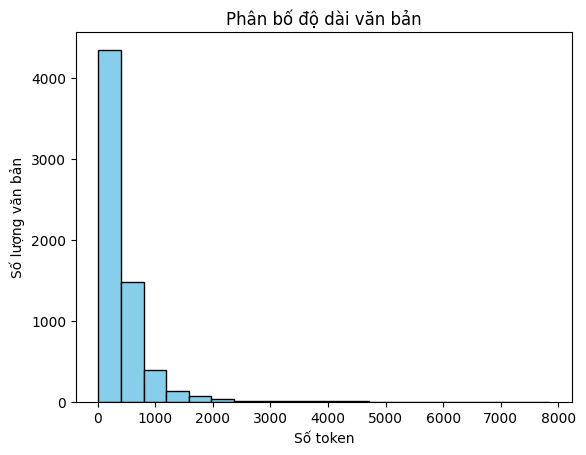

In [7]:
import os
import nltk
import matplotlib.pyplot as plt

# Tải dữ liệu cho nltk nếu cần
#nltk.download('punkt')

def count_tokens(file_path):
    """Đếm số token trong một file văn bản"""
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        tokens = nltk.word_tokenize(text)
        return len(tokens)

def plot_distribution(folder_path):
    """Vẽ đồ thị phân bố độ dài văn bản"""
    file_lengths = []
    file_names = []
    # Lặp qua các file trong thư mục
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.txt'):
            file_path = os.path.join(folder_path, file_name)
            length = count_tokens(file_path)
            file_lengths.append(length)
            if length > 4000:
                file_names.append(file_name)
    
    # Vẽ đồ thị
    plt.hist(file_lengths, bins=20, color='skyblue', edgecolor='black')
    plt.xlabel('Số token')
    plt.ylabel('Số lượng văn bản')
    plt.title('Phân bố độ dài văn bản')
    plt.show()
    return file_names

# Thư mục chứa các file văn bản
folder_path = 'zalo_txtfile_data/'

# Gọi hàm để vẽ đồ thị
file_names = plot_distribution(folder_path)

In [8]:
len(file_names)

16